## K Nearest Neighbours 

Here, we will use a classified data set from a company! We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features

## Import Libraries

In [53]:
import pandas as pd
import numpy as np

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

Set index_col=0 to use the first column as the index.

In [69]:
df=pd.read_csv('Classified Data',index_col=0)

In [70]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standarize the variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()

In [73]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [77]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [78]:
df_feat.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


## Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X=scaler_features
y=df['TARGET CLASS']

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Using KNN

We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

## Prediction and Evaluation

Let's evaluate our KNN model!

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
confusion_matrix(y_test,pred)

array([[143,  15],
       [  9, 133]], dtype=int64)

In [87]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.92       158\n           1       0.90      0.94      0.92       142\n\n    accuracy                           0.92       300\n   macro avg       0.92      0.92      0.92       300\nweighted avg       0.92      0.92      0.92       300\n'

## Choosing a K value

Let's go ahead and use the elbow method to pick a good K Value:

In [88]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0.5, 1.0, 'Error Rate vs K value')

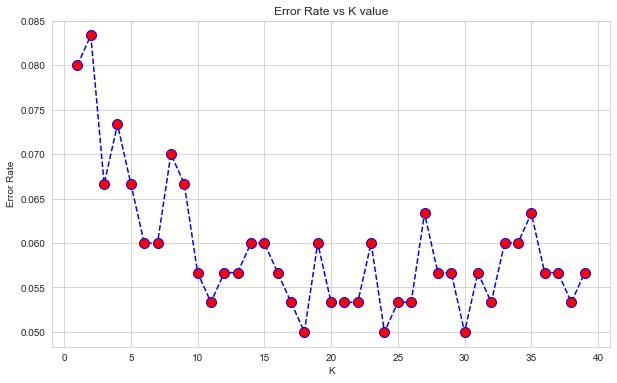

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K value')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [95]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[143  15]
 [  9 133]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       158
           1       0.90      0.94      0.92       142

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [96]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[147  11]
 [  7 135]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       158
           1       0.92      0.95      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



We were able to squeeze some more performance out of our model by tuning to a better K value!